<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Adaptive%20method%20by%20step%20halving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function representing the ODE dy/dt = -2y
def ode_function(t, y):
    return 10 * np.exp(-(t - 2) * (t - 2) / (2 * 0.075 ** 2)) - 0.6 * y

# Adaptive step size Euler method with step halving
def adaptive_euler(ode_func, y0, t0, t_end, h0, tol):
    t_values = [t0]
    y_values = [y0]
    h = h0
    t = t0
    y = y0

    while t < t_end:
        if t + h > t_end:  # Ensure we do not step beyond t_end
            h = t_end - t

        # Euler method with step size h
        y1 = y + h * ode_func(t, y)

        # Two steps with step size h/2
        y_half_step1 = y + (h / 2) * ode_func(t, y)
        y_half_step2 = y_half_step1 + (h / 2) * ode_func(t + h / 2, y_half_step1)

        # If error is within tolerance, accept the step
        error = np.abs(y1 - y_half_step2)
        if error < tol:
            t += h
            y = y_half_step2
            t_values.append(t)
            y_values.append(y)

        # Adjust step size based on error
        if error > tol:
            h /= 2  # Reduce step size if error exceeds tolerance
        elif error < tol / 10:
            h *= 2  # Increase step size

    return np.array(t_values), np.array(y_values)



In [6]:

# Solve using adaptive step size Euler method
y0 = 0.5; t0 = 0; t_end = 4; h0 = 0.2; tol = 1e-3 # Tolerance for adaptive step
t_values, y_values = adaptive_euler(ode_function, y0, t0, t_end, h0, tol)

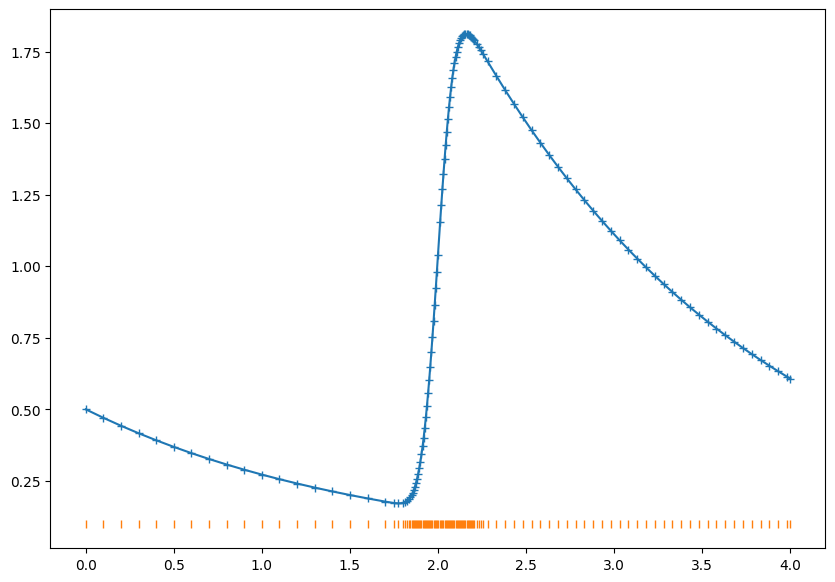

In [7]:
plt.figure(figsize=(10, 7)) # create a figure
plt.plot(t_values, y_values, label='Adaptive Euler', marker='+')
plt.plot(t_values, np.ones(len(t_values)) * 0.1, label='Step marker', marker='|', linestyle='none')